## Importing libraries

In [2]:
# https://www.codegrepper.com/code-examples/python/pandas+disable+warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading files and data manipulation

In [3]:
# reading and cleaning the females dataset
females = pd.read_json('females.json')
female_prompts = pd.DataFrame(females['prompts'].tolist(), columns=['birth_sign', 'pets', 'smoker'])
females = females.join(female_prompts)
females = females.drop(['id', 'prompts'], 1)

females['gender'] = 'Female'
females['bio_length'] = females['bio'].str.split('').str.len()
females['bio_length'] = females['bio_length'].replace('', 0).astype('int')

females['bio_length'][females.bio_length == 2] = 0

females.head()

,gender,bio,interests,anthem,birth_sign,pets,smoker,bio_length
0,Female,Instagram- leonor_ortizzz,"[Coffee, Activism, Foodie, Music, Movies]",,,,,27
1,Female,"lover of avocados, coconuts, and one too many ...","[Fashion, Karaoke, Museum, Brunch, Volunteering]","OPEN A WINDOW (feat. Tyler, The Creator)",Aries,,,60
2,Female,mommy issue haver costco hotdog enthusiast goo...,"[Foodie, Music, Karaoke, Dog lover, Comedy]",Fair Trade (with Travis Scott),Libra,Dog,Social smoker,63
3,Female,Follow my new insta page: angelisse_req Im 18 ...,"[Foodie, Tattoos, Sports, Astrology, Spiritual...",,,,,75
4,Female,"they/she. from bushwick, and 420 friendly. :) ...","[Photography, Black Lives Matter, Movies, Musi...",Wolfcat,Scorpio,Cat,,112


In [4]:
# reading and cleaning the males dataset
males = pd.read_json('males.json')
male_prompts = pd.DataFrame(males['prompts'].tolist(), columns=['birth_sign', 'pets', 'smoker'])
males = males.join(male_prompts)
males = males.drop(['id', 'prompts'], 1)

males['gender'] = 'Male'
males['bio_length'] = males['bio'].str.split('').str.len()
males['bio_length'] = males['bio_length'].replace('', 0).astype('int')

males['bio_length'][males.bio_length == 2] = 0

males.head()

,gender,bio,interests,anthem,birth_sign,pets,smoker,bio_length
0,Male,Jmu baseball 26 Don Bosco Prep 22,[Working out],,,,,36
1,Male,,"[Outdoors, Netflix, Comedy, Hiking]",,,,,0
2,Male,,"[Movies, Tattoos, Working out, Music, Sports]",,Capricorn,Reptile,Smoker,0
3,Male,I workout in the morning so the rest of the da...,"[Travel, Music, Working out]",Hurricane,,,,114
4,Male,,[Coffee],,,,,0


In [5]:
# joining male and female datasets
profiles = females.append(males)
profiles = profiles.replace('',np.nan)

# https://stackoverflow.com/questions/40818924/replace-empty-list-with-nan-in-pandas-dataframe
# profiles.interests = profiles.interests.apply(lambda x: np.nan if len(x) == 0 else x)

profiles['num_interests'] = profiles['interests'].str.len()
profiles['num_interests'] = profiles['num_interests'].replace(np.nan, 0)
profiles['num_interests'] = profiles['num_interests'].astype('int')

profiles

,gender,bio,interests,anthem,birth_sign,pets,smoker,bio_length,num_interests
0,Female,Instagram- leonor_ortizzz,"[Coffee, Activism, Foodie, Music, Movies]",NaN,NaN,NaN,NaN,27,5
1,Female,"lover of avocados, coconuts, and one too many ...","[Fashion, Karaoke, Museum, Brunch, Volunteering]","OPEN A WINDOW (feat. Tyler, The Creator)",Aries,NaN,NaN,60,5
2,Female,mommy issue haver costco hotdog enthusiast goo...,"[Foodie, Music, Karaoke, Dog lover, Comedy]",Fair Trade (with Travis Scott),Libra,Dog,Social smoker,63,5
3,Female,Follow my new insta page: angelisse_req Im 18 ...,"[Foodie, Tattoos, Sports, Astrology, Spiritual...",NaN,NaN,NaN,NaN,75,5
4,Female,"they/she. from bushwick, and 420 friendly. :) ...","[Photography, Black Lives Matter, Movies, Musi...",Wolfcat,Scorpio,Cat,NaN,112,5
...,...,...,...,...,...,...,...,...,...
45,Male,NaN,"[Reading, Sports, Movies]",NaN,NaN,NaN,NaN,0,3
46,Male,NaN,"[Surfing, Tattoos, Stocks, Yoga, Ramen]",NaN,Taurus,Pet-free,Non-smoker,0,5
47,Male,Best Dad in the world,"[Netflix, Travel, Hiking, Fishing]",NaN,NaN,NaN,NaN,23,4
48,Male,Chubby Dude lifting Chubby Weights Seeking: -V...,"[Mental Heath Awareness, Working out, Dungeons...",I'll Go,Aries,NaN,Non-smoker,330,5


## Ascertaining information about most common interests

In [6]:
# finding the most common interest for all genders
from collections import Counter

def getMostCommonInterest(df):
    interests = []
    for profile_interest_list in df.interests:
        interests += profile_interest_list
    c = Counter(interests)
    return c.most_common(5)


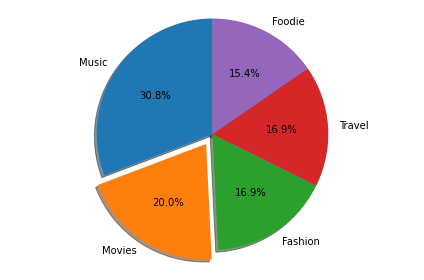

In [26]:
plot = getMostCommonInterest(females)
female_interest = pd.DataFrame(plot, columns=['Interest', 'Frequency'])

plt.pie(female_interest['Frequency'],labels=female_interest['Interest'], explode=(0, 0.1, 0, 0, 0), shadow=True, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


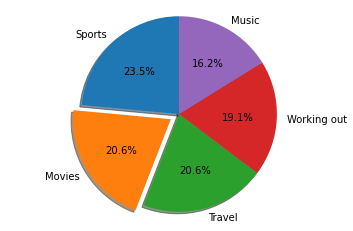

In [30]:
plot = getMostCommonInterest(males)
male_interest = pd.DataFrame(plot, columns=['Interest', 'Frequency'])

plt.pie(male_interest['Frequency'],labels=male_interest['Interest'], explode=(0, 0.1, 0, 0, 0), shadow=True, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

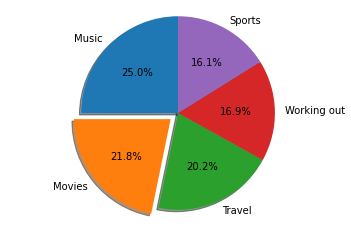

In [31]:
plot = getMostCommonInterest(profiles)
total_interest = pd.DataFrame(plot, columns=['Interest', 'Frequency'])

plt.pie(total_interest['Frequency'],labels=total_interest['Interest'], explode=(0, 0.1, 0, 0, 0), shadow=True, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()